In [40]:
# Import Required Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm

import os
import sys
import time
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable

from scipy.ndimage import rotate
from pretrained_models.resnet20 import ResNetCIFAR

from functions import *
from importlib import reload

reload(sys.modules["functions"])

<module 'functions' from '/workspaces/Adversarial-Patches-Experimentation/10_code/functions.py'>

## Prepare Data

In [3]:
# PARAMS
batch_size = 256
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# target = 1  # automobile

# CIFAR-10 image tensor mean and std
NORM_MEAN = [0.4914, 0.4822, 0.4465]
NORM_STD = [0.2023, 0.1994, 0.2010]

# TODO: should we apply the below transformations?
transform_train = transforms.Compose(
    [
        # transforms.RandomCrop(32, padding=4),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=NORM_MEAN, std=NORM_STD),
    ]
)

transform_test = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(mean=NORM_MEAN, std=NORM_STD)]
)

transform_image = transforms.ToPILImage()

print("==> Preparing data..")
trainset = torchvision.datasets.CIFAR10(
    root="../00_data", train=True, download=True, transform=transform_train
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=4
)

testset = torchvision.datasets.CIFAR10(
    root="../00_data", train=False, download=True, transform=transform_test
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2
)

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Train-Validation Split
train_set, val_set = torch.utils.data.random_split(trainset, [0.8, 0.2])
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=4
)
val_loader = torch.utils.data.DataLoader(
    val_set, batch_size=32, shuffle=False, drop_last=False, num_workers=4
)

# Untargeted Attack

### Square Patch - Train & Generation

In [6]:
p_16_u, r_16_u = generate_patch(patch_size = 16, patch_type = 'square', targeted = False, train_loader = train_loader, val_loader = val_loader, device = 'cuda', num_epochs = 10)

  0%|          | 0/156 [00:00<?, ?it/s]/workspaces/Adversarial-Patches-Experimentation/10_code/pretrained_models/FP_layers.py:134: UserWarning: Attempt to open cnn_infer failed: handle=0 error: libcudnn_cnn_infer.so.8: cannot open shared object file: No such file or directory (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:78.)
  return F.conv2d(


Epoch 0, Attack Success Rate: 0.6768749952316284.


Epoch 5, Attack Success Rate: 0.9035999774932861.


Epoch 9, Attack Success Rate: 0.9035750031471252.


In [7]:
p_7_u, r_7_u = generate_patch(patch_size = 7, patch_type = 'square', targeted = False, train_loader = train_loader, val_loader = val_loader, device = 'cuda', num_epochs = 10)

Epoch 0, Attack Success Rate: 0.3500500023365021.


Epoch 5, Attack Success Rate: 0.6795499920845032.


Epoch 9, Attack Success Rate: 0.6822249889373779.


In [8]:
p_5_u, r_5_u = generate_patch(patch_size = 5, patch_type = 'square', targeted = False, train_loader = train_loader, val_loader = val_loader, device = 'cuda', num_epochs = 10)

Epoch 0, Attack Success Rate: 0.24232499301433563.


Epoch 5, Attack Success Rate: 0.5465750098228455.


Epoch 9, Attack Success Rate: 0.5608749985694885.


In [9]:
p_3_u, r_3_u = generate_patch(patch_size = 3, patch_type = 'square', targeted = False, train_loader = train_loader, val_loader = val_loader, device = 'cuda', num_epochs = 10)

Epoch 0, Attack Success Rate: 0.13392499089241028.


Epoch 5, Attack Success Rate: 0.2854749858379364.


Epoch 9, Attack Success Rate: 0.2955249845981598.


### Evaluation & Results Generation

In [35]:
# collecting results
patch_size = ['3 x 3', '5 x 5', '7 x 7', '16 x 16']
classes = ('Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
patches = [p_3_u, p_5_u, p_7_u, p_16_u]
results = [r_3_u, r_5_u, r_7_u, r_16_u]

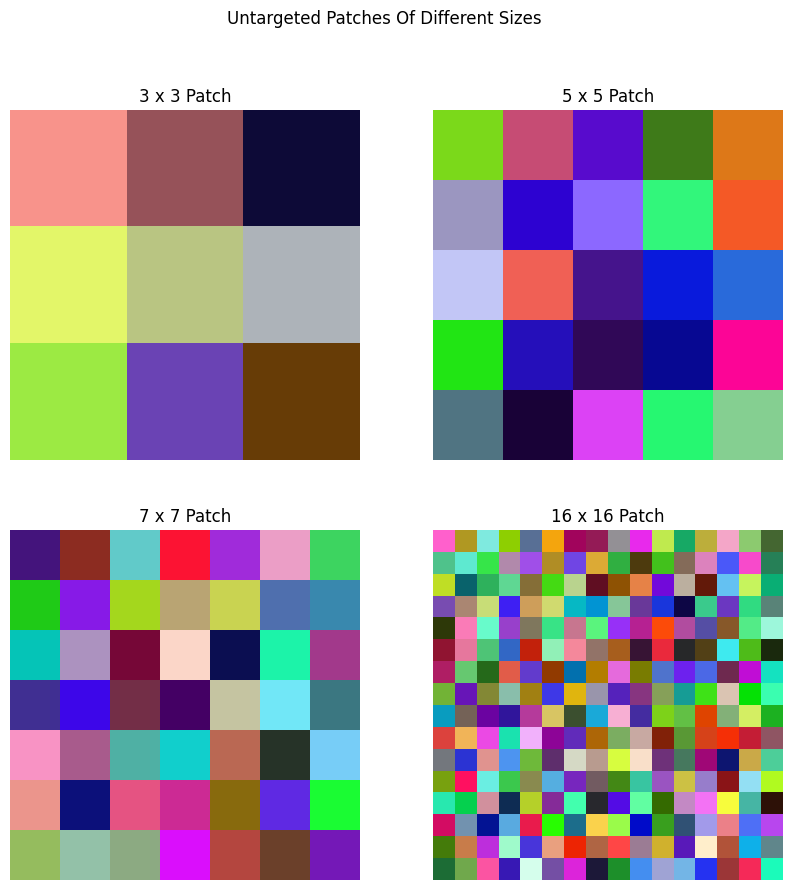

In [29]:
# visualizing each patch
plt.figure(figsize=(10, 10))

for i in range(len(patch_size)):
    plt.subplot(2, 2, i + 1)
    image = transform_image(patches[i])
    plt.imshow(image)
    plt.title(patch_size[i] + " Patch")
    plt.axis("off")

plt.suptitle(f"Untargeted Patches Of Different Sizes")

plt.savefig(f"../20_output_files/untargeted_patches.png")

Validating...:   0%|          | 1/313 [00:00<00:49,  6.33it/s]

Test Loss=0.0343, Test accuracy=0.9886


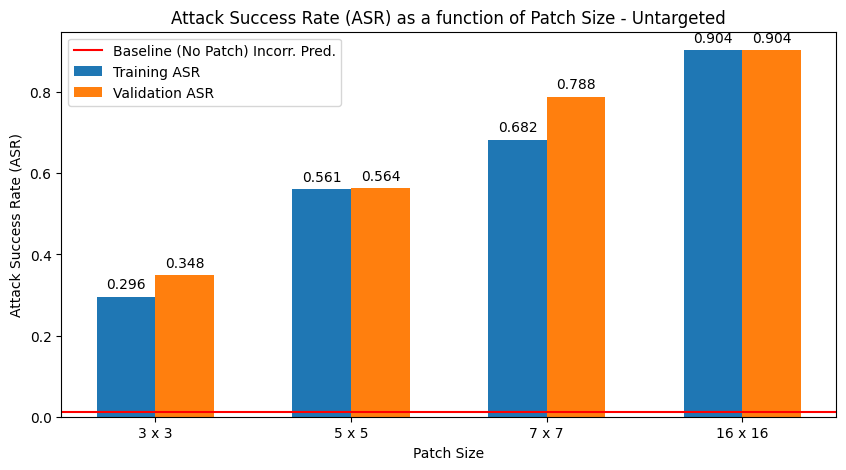

In [41]:
# plot the ASR as a function of the patch size

plot_asr(patches, results, val_loader, patch_size, attack_type = 'Untargeted', shape = 'square')

# Targeted Attack - TODO IGNORE FOR NOW

### Square Patch For Automobile - Train & Generation

In [ ]:
for i in range(len(classes)):
    pass

In [ ]:
p_16_t, r_16_t = generate_patch(patch_size = 16, patch_type = 'square', targeted = True, train_loader = train_loader, val_loader = val_loader, target_class = 1, device = 'cuda', num_epochs = 10)

### Circle Patch - Train & Generation

In [12]:
# generating a 16 x 16 patch for automobiles

circle_patch_16, results_circle_16 = generate_patch(patch_size = 16, patch_type = 'circle', targeted = True, train_loader = train_loader, val_loader = val_loader, target_class = 1, device = 'cuda', num_epochs = 20)

  0%|          | 0/156 [00:00<?, ?it/s]/workspaces/Adversarial-Patches-Experimentation/10_code/pretrained_models/FP_layers.py:134: UserWarning: Attempt to open cnn_infer failed: handle=0 error: libcudnn_cnn_infer.so.8: cannot open shared object file: No such file or directory (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:78.)
  return F.conv2d(


Epoch 0, Attack Success Rate: 0.2987886071205139.


Epoch 5, Attack Success Rate: 0.963297426700592.


Epoch 10, Attack Success Rate: 0.9710769057273865.


Epoch 15, Attack Success Rate: 0.9752445220947266.


In [13]:
# generating a 7 x 7 patch for automobiles
circle_patch_7, results_circle_7 = generate_patch(patch_size = 7, patch_type = 'circle', targeted = True, train_loader = train_loader, val_loader = val_loader, target_class = 1, device = 'cuda', num_epochs = 20)

  0%|          | 0/156 [00:00<?, ?it/s]

Epoch 0, Attack Success Rate: 0.04114803299307823.


Epoch 5, Attack Success Rate: 0.5492331385612488.


Epoch 10, Attack Success Rate: 0.5497610569000244.


Epoch 15, Attack Success Rate: 0.55165034532547.


In [14]:
# generating a 5 x 5 patch for automobiles
circle_patch_5, results_circle_5 = generate_patch(patch_size = 5, patch_type = 'circle', targeted = True, train_loader = train_loader, val_loader = val_loader, target_class = 1, device = 'cuda', num_epochs = 20)

  0%|          | 0/156 [00:00<?, ?it/s]

Epoch 0, Attack Success Rate: 0.02039342001080513.


Epoch 5, Attack Success Rate: 0.16425871849060059.


Epoch 10, Attack Success Rate: 0.16823183000087738.


Epoch 15, Attack Success Rate: 0.16934318840503693.


In [15]:
# generating a 3 x 3 patch for automobiles
circle_patch_3, results_circle_3 = generate_patch(patch_size = 3, patch_type = 'circle', targeted = True, train_loader = train_loader, val_loader = val_loader, target_class = 1, device = 'cuda', num_epochs = 20)

Epoch 0, Attack Success Rate: 0.011169148609042168.


Epoch 5, Attack Success Rate: 0.010557902045547962.


Epoch 10, Attack Success Rate: 0.01030784659087658.


Epoch 15, Attack Success Rate: 0.009613247588276863.


### Evaluation & Results Generation

In [36]:
# visualizing each patch
target = 1
patch_size = ['2 x 2', '4 x 4', '6 x 6', '16 x 16']
classes = ('Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
patches = [circle_patch_3, circle_patch_5, circle_patch_7, circle_patch_16]
results = [results_circle_3, results_circle_5, results_circle_7, results_circle_16]

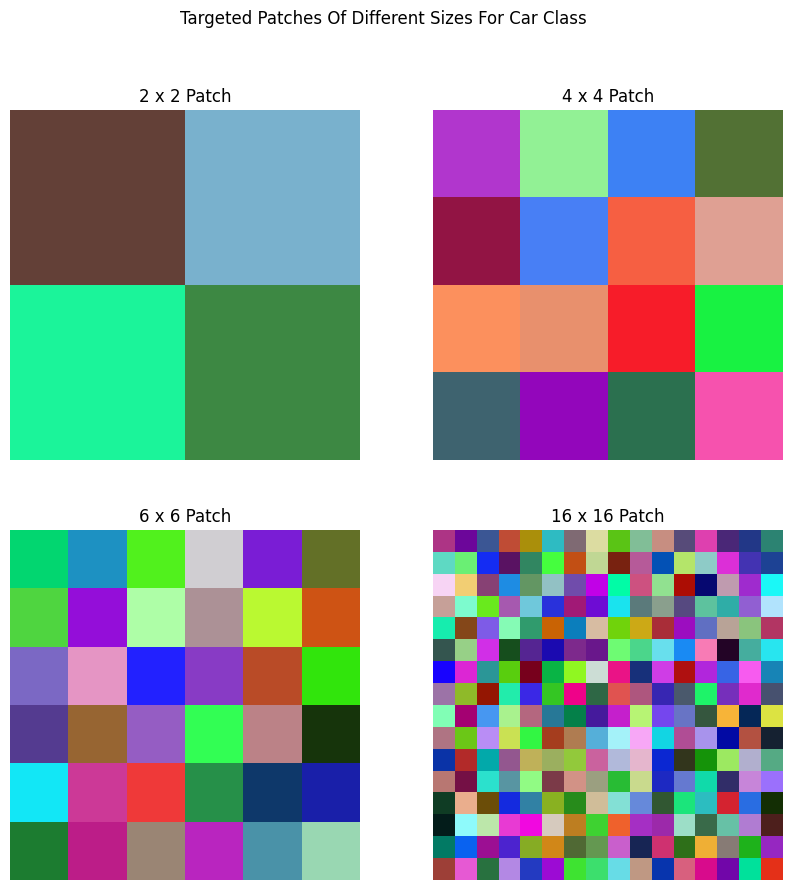

In [62]:
plt.figure(figsize=(10, 10))

for i in range(len(patch_size)):
    plt.subplot(2, 2, i + 1)
    image = transform_image(patches[i])
    plt.imshow(image)
    plt.title(patch_size[i] + " Patch")
    plt.axis("off")

plt.suptitle(f"Targeted Patches Of Different Sizes For {classes[target]} Class")

plt.savefig(f"../20_output_files/targeted_patches_{classes[target]}.png")

Validating...:   0%|          | 0/313 [00:00<?, ?it/s]

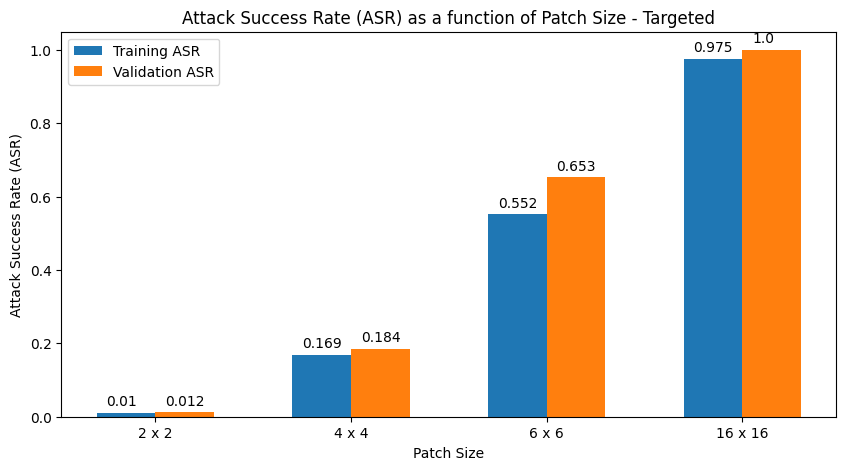

In [63]:
# plot the ASR as a function of the patch size

plot_asr(patches, results, val_loader, patch_size, target, device = device, attack_type = 'Targeted', shape = 'circle')

### Transferability - VGG

In [26]:
# evaluate for vgg
vgg_model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn') # batch normalized
vgg_model = vgg_model.to(device)
vgg_model.load_state_dict(torch.load("./pretrained_models/pretrained_vgg_model.pt")) # run the vgg.ipynb notebook if you want to generate the .pt file. Too big to upload to github.

Using cache found in /home/codespace/.cache/torch/hub/pytorch_vision_v0.10.0


<All keys matched successfully>

In [ ]:
plot_asr(patches, results, val_loader, patch_size, attack_type = 'Untargeted', shape = 'square', model = vgg_model, model_name = 'VGG16')

### Square Patch - Train & Generation

In [6]:
# generating a 16 x 16 patch for automobiles
p_sq_16, x_sq_16 = patch_attack_targeted(re, device, train_loader, val_loader, target_class=1, patch_size=16, patch_type="square", num_epochs=20)

Epoch 0, Attack Success Rate: 0.6897194981575012.


Epoch 5, Attack Success Rate: 0.931259036064148.


Epoch 10, Attack Success Rate: 0.940971851348877.


Epoch 15, Attack Success Rate: 0.948458194732666.


In [ ]:
# generating a 7 x 7 patch for automobiles
p_sq_7, x_sq_7 = patch_attack_targeted(resnet, device, train_loader, val_loader, target_class=1, patch_size=7, patch_type="square", num_epochs=20)

In [ ]:
# generating a 5 x 5 patch for automobiles
p_sq_5, x_sq_5 = patch_attack_targeted(resnet, device, train_loader, val_loader, target_class=1, patch_size=5, patch_type="square", num_epochs=20)

In [ ]:
# generating a 3 x 3 patch for automobiles
p_sq_3, x_sq_3 = patch_attack_targeted(resnet, device, train_loader, val_loader, target_class=1, patch_size=3, patch_type="square", num_epochs=20)